**In this project, we aim to predict the most favorable restaurant locations in Bangalore based on customer ratings, facilitating strategic decision-making for restaurant owners and investors.**

### 1. Importing the Necessary Libraries

In [1]:
import pandas as pd  #to manipulate the data we use pandas 

import numpy as np   #NumPy can be used to perform a wide variety of mathematical operations on arrays.

import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive 
                                       # visualizations in Python. Matplotlib makes easy things easy and hard things possible.
    
import seaborn as sns     #Seaborn library is a widely popular data visualization library that is commonly used for 
                                         #data science and machine learning tasks.
from warnings import filterwarnings  ## filter the Warning 
filterwarnings('ignore')

### 2. Loading the Dataset


In [2]:
df=pd.read_csv(r"C:\Users\mdine\Downloads\Machine Learning\Capstone Project\Zomota\zomato.csv") #read the data from zomato dataset using pandans
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.columns #checking columns 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.shape

(51717, 17)

### 3. EDA [Exploratory Data Analysis]


### Removing unnecessary columns 

In [5]:
df['menu_item'].head() # this column does't have any information

0    []
1    []
2    []
3    []
4    []
Name: menu_item, dtype: object

In [6]:
df.dish_liked.head(2)

0    Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1    Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
Name: dish_liked, dtype: object

In [7]:
df.dish_liked.isnull().sum() # this column has lots of null value 

28078

In [8]:
data=df.drop(['menu_item','url','phone','address','dish_liked','menu_item','reviews_list','listed_in(city)'],axis=1)

# if i can use  inplace = True it effect my origenal data

data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### cheching information about data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [10]:
data.shape #51717 columns and 10 rows

(51717, 10)

### check duplicated

In [11]:
data.duplicated() # checking duplicates records

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [12]:
data[data.duplicated()] # show the duplicated record which we have

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out
2482,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
2483,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
2488,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
...,...,...,...,...,...,...,...,...,...,...
51633,Re:fuel- Aloft Bengaluru Cessna Business Park,No,No,NaN,0,Bellandur,"Cafe, Bakery","Bakery, Beverages, Cafe, Coffee, Desserts, San...","1,000",Dine-out
51637,The Crunch,No,No,3.3 /5,6,Brookefield,Beverage Shop,Beverages,300,Dine-out
51639,Kale Cafe,No,No,NaN,0,Brookefield,Quick Bites,"Fast Food, Kerala",100,Dine-out
51642,Basaveshwara Khanavali,No,No,NaN,0,Brookefield,Quick Bites,South Indian,200,Dine-out



### drop the duplicates 

In [13]:
data.drop_duplicates(keep='first',inplace=True) # inplace is true means it effect original data

In [14]:
data.shape

(35011, 10)

In [15]:
data.isnull().sum() #check the whether data has null value or not if it has null records then count the records

name                              0
online_order                      0
book_table                        0
rate                           3770
votes                             0
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
listed_in(type)                   0
dtype: int64

In [16]:
null_values = {i:data[i].isnull().sum() for i in data.columns} #it is same has privious code in deffirent way

null_values

{'name': 0,
 'online_order': 0,
 'book_table': 0,
 'rate': 3770,
 'votes': 0,
 'location': 14,
 'rest_type': 156,
 'cuisines': 33,
 'approx_cost(for two people)': 221,
 'listed_in(type)': 0}

In [17]:
empty_data = data.isnull().sum() #just i want to show only null value 
empty_data[empty_data>0]

rate                           3770
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
dtype: int64

In [18]:
data[data.isnull().any(axis=1)] #it shows the all null value 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500,Delivery
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,South Indian,200,Delivery
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",Beverages,250,Delivery
...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,North Indian,400,Dine-out
51675,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Drinks & nightlife
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars



### visualization null values by using heatmap

<Axes: >

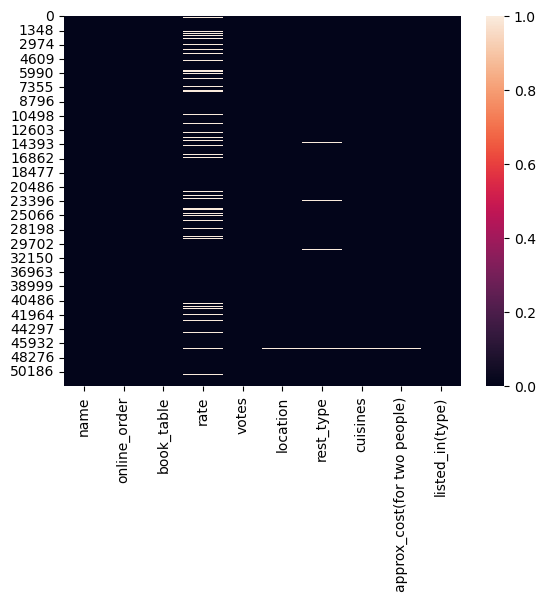

In [19]:
sns.heatmap(data.isnull())


# cleaning the Rate column


In [20]:
print("There are {} values are unique in Rate Columns".format(len(data["rate"].unique())))
                                #it gives the length of the unique value in the rate column

data["rate"].unique() #it shows unique value in the rate column

There are 65 values are unique in Rate Columns


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### i noted that i want chenge object datatype to float datatype and some string value "NEW","-" to Nan and i don't want that "/5"

In [21]:
def rate(data):                          #using function and function name is data
    if data == "NEW" or data == "-":     #if any columns have "NEW","-" it convert to nun
        return np.nan                    #NumPy NAN stands for not a number and is defined as a substitute for declaring value
                                                   #which are numerical values that are missing values in an array 
    else:                                   
        data = str(data).split("/")       # i split the data "/"
        data = data[0]                     
        return float(data)                  #it returns float

In [22]:
data["rate"].apply(rate) #here we can see i removed "/5" and i converted object to float because i should float type not object

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35011, dtype: float64

In [23]:
data["rate"] = data["rate"].apply(rate)  # the result of the function i declare to rate column in original data

<Axes: >

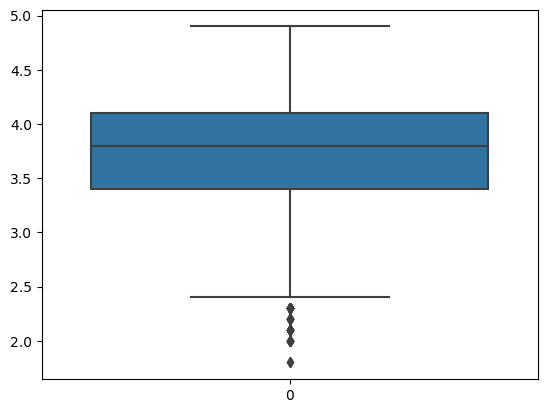

In [24]:
sns.boxplot(data.rate) # just i want to see wheather my column has extreme outliers then the column's data is good 

In [25]:
data["rate"].value_counts().index

Float64Index([3.9, 3.8, 3.7, 4.0, 4.1, 3.6, 3.5, 4.2, 3.4, 3.3, 4.3, 3.2, 3.1,
              4.4, 3.0, 4.5, 2.9, 2.8, 4.6, 2.7, 2.6, 4.7, 2.5, 4.8, 2.4, 4.9,
              2.3, 2.1, 2.2, 2.0, 1.8],
             dtype='float64')

In [26]:
#Now replace null value with the mean value that complete rate column

data["rate"] = data["rate"].fillna(data["rate"].mean()) #fillna file the all nun values

## rate column has zero null value now

In [27]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                      156
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [28]:
data.rest_type.nunique()

93

In [29]:
data[data.rest_type.isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
999,Mughlai Kitchen,Yes,No,3.500000,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
1300,Eat & Joy Restaurant,Yes,No,3.000000,7,JP Nagar,NaN,"Fast Food, Finger Food",300,Delivery
1376,Kababish Restaurant,Yes,No,3.600000,15,BTM,NaN,"North Indian, Chinese, Arabian",700,Delivery
1565,Goli Vada Pav No 1,No,No,3.730491,0,Bannerghatta Road,NaN,"Street Food, Burger",150,Delivery
1637,Ammi's Biryani,No,No,2.400000,392,Bannerghatta Road,NaN,"Biryani, North Indian",500,Delivery
...,...,...,...,...,...,...,...,...,...,...
50838,Vijayawada Heights,Yes,No,3.200000,8,Whitefield,NaN,North Indian,600,Delivery
50978,Snack Itt,No,No,3.730491,0,Whitefield,NaN,Bakery,200,Desserts
51130,Pindi Bangalore,Yes,No,3.730491,0,Whitefield,NaN,"North Indian, Chinese, Biryani, Street Food",900,Dine-out
51195,Special Biryani House,Yes,No,3.200000,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400,Dine-out


In [30]:
data['rest_type'].mode()[0]

'Quick Bites'

In [31]:
 #  Take most occured category in that vairable (.mode())
Mode_Category =data['rest_type'].mode()[0]

In [32]:
# Replace NAN values with most occured category in actual vairable
data['rest_type'].fillna(Mode_Category,inplace=True)

In [33]:
data.rest_type.isna().sum()

0

In [34]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                        0
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [35]:
data[data.location.isnull()] # here i check that "location	rest_type	cuisines	approx_cost(for two people)" 
                                #these all columns have null values. i should remove those null values

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1662,Papa Khan Rasoi,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
13693,Mohabbat Desi Restaurant,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
16351,Desi Chatkara,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
26432,New Taj Biryani Centre,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
26519,AB's - Absolute Barbecues,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Buffet
27672,Manchow,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
28611,Manchow,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
33457,La Lunch Box,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
40354,The Happy Vegetarian,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
40556,Risalo Restaurant,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Cafes


In [36]:
data.dropna(subset=['location'],inplace=True)

In [37]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                        19
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

In [38]:
data[data.cuisines.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
438,The House Of Vadapav,Yes,No,3.730491,0,Banashankari,Quick Bites,NaN,150,Delivery
440,Lassi Spot,Yes,No,3.300000,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery
759,The House Of Vadapav,Yes,No,3.730491,0,Banashankari,Quick Bites,NaN,150,Dine-out
4037,Chai Point,Yes,No,3.730491,0,Marathahalli,"Beverage Shop, Quick Bites",NaN,200,Delivery
6887,Noodle Oodle,Yes,No,3.600000,9,Whitefield,Delivery,NaN,400,Delivery
6897,Taste of Chettinad,Yes,No,3.730491,0,Whitefield,Delivery,NaN,400,Delivery
7277,Watheen Nuts,No,No,3.730491,0,Whitefield,"Takeaway, Delivery",NaN,400,Delivery
7555,Delhi Food Factory,Yes,No,3.730491,0,Marathahalli,Delivery,NaN,500,Delivery
13591,Delhi Food Factory,Yes,No,3.730491,0,Electronic City,Delivery,NaN,500,Delivery
22974,Delhi Food Factory,No,No,3.730491,0,Kumaraswamy Layout,Delivery,NaN,500,Delivery


In [39]:
Mode_Category =data['cuisines'].mode()[0]
data['cuisines'].fillna(Mode_Category,inplace=True)

In [40]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                         0
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

In [41]:
data[data['approx_cost(for two people)'].isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1768,Innate,No,No,3.730491,0,JP Nagar,Delivery,Beverages,NaN,Delivery
1795,Super Chef's (New Royal treat),No,No,3.730491,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3069,Super Chef's (New Royal treat),No,No,3.730491,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3774,The Hub - Ibis Bengaluru,No,No,3.900000,237,Marathahalli,Bar,Finger Food,NaN,Buffet
3954,North Indian Kitchen,No,No,3.200000,13,HSR,Takeaway,North Indian,NaN,Delivery
...,...,...,...,...,...,...,...,...,...,...
50764,Innate,No,No,3.730491,0,Whitefield,Delivery,Beverages,NaN,Delivery
50940,Cinnabon,No,No,4.000000,80,Whitefield,Quick Bites,"Beverages, American, Bakery",NaN,Desserts
51247,Mast Kalandar,No,No,2.600000,76,Whitefield,Casual Dining,North Indian,NaN,Dine-out
51271,Karavalli Food Court,No,No,3.200000,4,Whitefield,Casual Dining,South Indian,NaN,Dine-out


In [42]:
# Rename columns

data.rename(columns = {"approx_cost(for two people)":"Cost2plate","listed_in(type)":"Type"},inplace = True)

In [43]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


## cleaning the Cost2plate column

In [44]:
data["Cost2plate"].unique() #show the unique values

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [45]:
def remove_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

In [46]:
data['Cost2plate'].apply(remove_comma)

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: Cost2plate, Length: 34997, dtype: float64

In [47]:
data['Cost2plate']=data['Cost2plate'].apply(remove_comma) # result data assigned to cost2plate column in the original data

In [48]:
data.describe()

,rate,votes,Cost2plate
count,34997.000000,34997.000000,34790.000000
mean,3.730491,362.556762,593.568181
std,0.418817,940.316461,462.276792
min,1.800000,0.000000,40.000000
25%,3.500000,11.000000,300.000000
50%,3.730491,58.000000,450.000000
75%,4.000000,270.000000,700.000000
max,4.900000,16832.000000,6000.000000


**the Cost2plate column is cleaned now**

<Axes: >

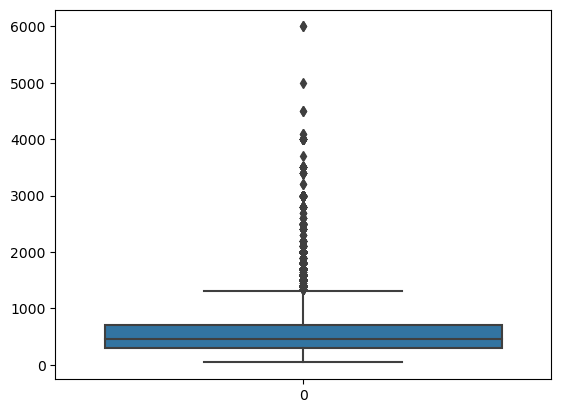

In [49]:
sns.boxplot(data.Cost2plate)

# i want to check outlies in my data

<Axes: >

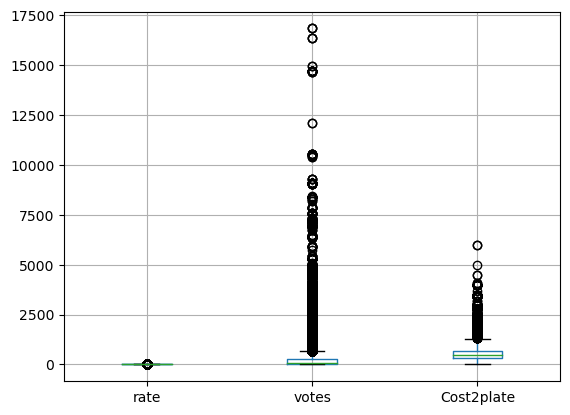

In [50]:
data.boxplot()

In [51]:
# in the votes column has null values then i need to remove those 
Q1 = df.votes.quantile(0.25)
Q3 = df.votes.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

7.0 198.0
191.0


(-279.5, 484.5)

In [52]:
data[(data.votes<lower_limit)|(data.votes>upper_limit)]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes
...,...,...,...,...,...,...,...,...,...,...
51699,Harry's Bar + Cafe,Yes,Yes,4.1,1218,Whitefield,Pub,"Asian, American, Mexican",1200.0,Pubs and bars
51700,BAR BAR,No,Yes,4.1,1003,Whitefield,"Bar, Casual Dining","Continental, North Indian, Italian",1500.0,Pubs and bars
51701,The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,"Finger Food, North Indian, Chinese, Italian",1400.0,Pubs and bars
51702,Pablo's Gastrobar,No,No,4.0,1094,Whitefield,Bar,"Finger Food, American, Asian, Italian",1450.0,Pubs and bars


In [53]:
data= data[(data.votes>lower_limit)&(data.votes<upper_limit)]

<Axes: >

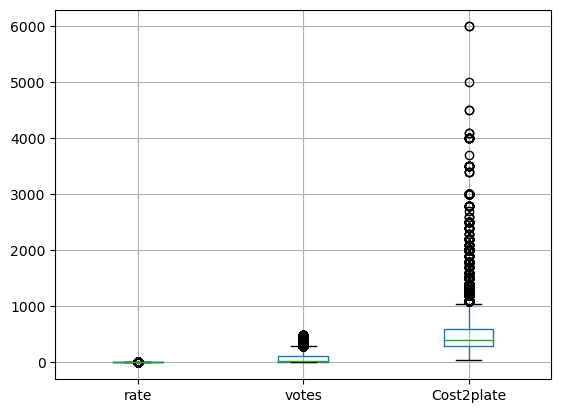

In [54]:
data.boxplot()

In [55]:
data[(data.Cost2plate>3010)].shape #these is extreme outlies in my cost2plate column's data i should remove that

(39, 10)

In [56]:
data=data[(data.Cost2plate<3010)]

<Axes: >

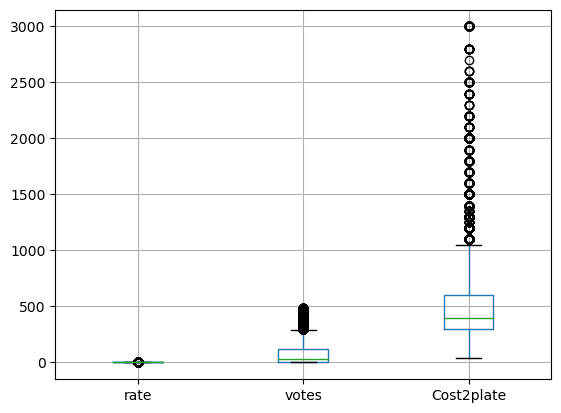

In [57]:
data.boxplot()

In [58]:
data[(data.Cost2plate>2800)].shape # i checked that above little outlier but that outlies contains 65 columns i shouldn't remove

(65, 10)

In [59]:
data["Cost2plate"] = data["Cost2plate"].fillna(data["Cost2plate"].mean())

In [60]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost2plate      0
Type            0
dtype: int64

**these is no null values in my data**

## all the datatype is set now

In [61]:
data.info()
# all the datatype set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28746 entries, 3 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          28746 non-null  object 
 1   online_order  28746 non-null  object 
 2   book_table    28746 non-null  object 
 3   rate          28746 non-null  float64
 4   votes         28746 non-null  int64  
 5   location      28746 non-null  object 
 6   rest_type     28746 non-null  object 
 7   cuisines      28746 non-null  object 
 8   Cost2plate    28746 non-null  float64
 9   Type          28746 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB


In [62]:
data.head(2) #if u check above all datatype has been done and no null values 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [63]:
data.shape

(28746, 10)

# cleaning  and clustering the rest_type column



In [64]:
data['rest_type'].value_counts() # all those rest have less like 1,2 ,etc.
                                                #what i can do is i will make cluster to make 1 to 1000 as other

Quick Bites                   11824
Casual Dining                  5431
Cafe                           1896
Delivery                       1411
Dessert Parlor                 1364
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Mess, Quick Bites                 1
Bakery, Sweet Shop                1
Name: rest_type, Length: 82, dtype: int64

In [65]:
rest_type=data['rest_type'].value_counts()  #i assigned data to rest_type variable
rest_type

Quick Bites                   11824
Casual Dining                  5431
Cafe                           1896
Delivery                       1411
Dessert Parlor                 1364
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Mess, Quick Bites                 1
Bakery, Sweet Shop                1
Name: rest_type, Length: 82, dtype: int64

In [66]:
rest_type_lessthan1000=rest_type[rest_type<1000]  # filtered the data lessthan 1000 and assign
rest_type_lessthan1000

Bakery                        726
Beverage Shop                 486
Food Court                    420
Casual Dining, Bar            413
Bar                           345
                             ... 
Pop Up                          1
Quick Bites, Kiosk              1
Dessert Parlor, Food Court      1
Mess, Quick Bites               1
Bakery, Sweet Shop              1
Name: rest_type, Length: 76, dtype: int64

In [67]:
def handle_rest_type(value):                   # using function like whereever 1 to 1000 data is their then i shows 'Others'
    if(value in rest_type_lessthan1000):                                        # by using if statement
        return 'others'
    else:
        return value

In [68]:
data['rest_type']=data['rest_type'].apply(handle_rest_type) # same like assigned the data

In [69]:
data['rest_type'].value_counts()

Quick Bites           11824
others                 5614
Casual Dining          5431
Cafe                   1896
Delivery               1411
Dessert Parlor         1364
Takeaway, Delivery     1206
Name: rest_type, dtype: int64

In [70]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes


# cleaning and clustering the location column



In [71]:
data['location'].value_counts() #i will make clustering like lessthan 300

BTM                     2324
Whitefield              1706
HSR                     1514
Marathahalli            1480
Indiranagar             1183
                        ... 
West Bangalore             4
Nagarbhavi                 4
Jakkur                     1
Rajarajeshwari Nagar       1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [72]:
data['location'].value_counts().unique()

array([2324, 1706, 1514, 1480, 1183, 1161, 1129, 1042, 1032,  967,  870,
        805,  524,  521,  519,  502,  489,  461,  455,  443,  435,  430,
        426,  408,  390,  384,  371,  369,  359,  332,  309,  282,  243,
        221,  184,  180,  173,  169,  167,  164,  157,  155,  153,  147,
        137,  129,  128,  119,  112,  107,  103,  102,   99,   95,   84,
         79,   77,   73,   72,   68,   63,   56,   51,   49,   46,   44,
         40,   36,   34,   21,   19,   18,   17,   16,   14,   13,    9,
          5,    4,    1], dtype=int64)

In [73]:
#same like previous

location=data['location'].value_counts()
location
location_less300=location[location<300]

def handle_location(value):
    if(value in location_less300):
        return 'others'
    else:
        return value
    

In [74]:
data['location']=data['location'].apply(handle_location) # assigned
data['location'].value_counts()

others                   4976
BTM                      2324
Whitefield               1706
HSR                      1514
Marathahalli             1480
Indiranagar              1183
Electronic City          1161
JP Nagar                 1129
Bellandur                1042
Jayanagar                1032
Bannerghatta Road         967
Koramangala 5th Block     870
Sarjapur Road             805
Kalyan Nagar              524
Brigade Road              521
Brookefield               519
Banashankari              502
New BEL Road              489
Ulsoor                    461
Koramangala 1st Block     455
Malleshwaram              443
Frazer Town               435
Basavanagudi              430
Koramangala 7th Block     430
Banaswadi                 426
Rajajinagar               408
Koramangala 6th Block     390
Kammanahalli              384
Koramangala 4th Block     371
Old Airport Road          369
MG Road                   359
Richmond Road             332
Domlur                    309
Name: loca

In [75]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes


# cleaning and clustering the cuisines column



In [76]:
data['cuisines'].value_counts()  #cluster just 1 to 100 values

North Indian                                       1683
North Indian, Chinese                              1494
South Indian                                       1111
Bakery, Desserts                                    576
Biryani                                             545
                                                   ... 
North Indian, Beverages, Juices                       1
South Indian, Chinese, Desserts, Beverages            1
South Indian, Fast Food, North Indian, Desserts       1
Chinese, Rolls, Biryani, Momos                        1
North Indian, Chinese, Arabian, Momos                 1
Name: cuisines, Length: 2341, dtype: int64

In [77]:
data['cuisines'].value_counts().unique()

array([1683, 1494, 1111,  576,  545,  482,  457,  424,  421,  383,  291,
        274,  256,  243,  233,  213,  203,  199,  195,  184,  179,  174,
        167,  164,  159,  156,  152,  149,  145,  130,  129,  127,  126,
        123,  116,  110,  109,  107,  106,  105,  100,   97,   95,   94,
         84,   82,   78,   76,   74,   70,   69,   68,   67,   65,   64,
         61,   60,   58,   57,   56,   55,   54,   53,   52,   51,   50,
         49,   48,   47,   46,   45,   44,   43,   42,   41,   39,   38,
         37,   36,   35,   34,   33,   32,   31,   30,   29,   28,   27,
         26,   25,   24,   23,   22,   21,   20,   19,   18,   17,   16,
         15,   14,   13,   12,   11,   10,    9,    8,    7,    6,    5,
          4,    3,    2,    1], dtype=int64)

In [78]:
# same as previous

cuisines=data['cuisines'].value_counts()
cuisines
cuisines_less150=cuisines[cuisines<150]

def handle_cuisines(value):
    if(value in cuisines_less150):
        return 'others'
    else:
        return value

In [79]:
data['cuisines']=data['cuisines'].apply(handle_cuisines) #assigned
data['cuisines'].value_counts()

others                                 17554
North Indian                            1683
North Indian, Chinese                   1494
South Indian                            1111
Bakery, Desserts                         576
Biryani                                  545
Fast Food                                482
South Indian, North Indian, Chinese      457
Desserts                                 424
Cafe                                     421
Bakery                                   383
Chinese                                  291
Ice Cream, Desserts                      274
Mithai, Street Food                      256
Chinese, North Indian                    243
North Indian, Chinese, Biryani           233
Desserts, Ice Cream                      213
South Indian, North Indian               203
North Indian, South Indian, Chinese      199
North Indian, South Indian               195
North Indian, Biryani                    184
Street Food                              179
Biryani, N

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28746 entries, 3 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          28746 non-null  object 
 1   online_order  28746 non-null  object 
 2   book_table    28746 non-null  object 
 3   rate          28746 non-null  float64
 4   votes         28746 non-null  int64  
 5   location      28746 non-null  object 
 6   rest_type     28746 non-null  object 
 7   cuisines      28746 non-null  object 
 8   Cost2plate    28746 non-null  float64
 9   Type          28746 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB


In [81]:
data['Type'].value_counts()

Delivery              13949
Dine-out              10646
Desserts               2235
Cafes                   895
Drinks & nightlife      377
Buffet                  341
Pubs and bars           303
Name: Type, dtype: int64

# Data is Cleaned now, Lets go to to Visualization




In [82]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plate', 'Type'],
      dtype='object')

## 4.1) Histograms

Histograms are one of the most common graphs used to display numeric data.
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

In [83]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,others,700.0,Cafes


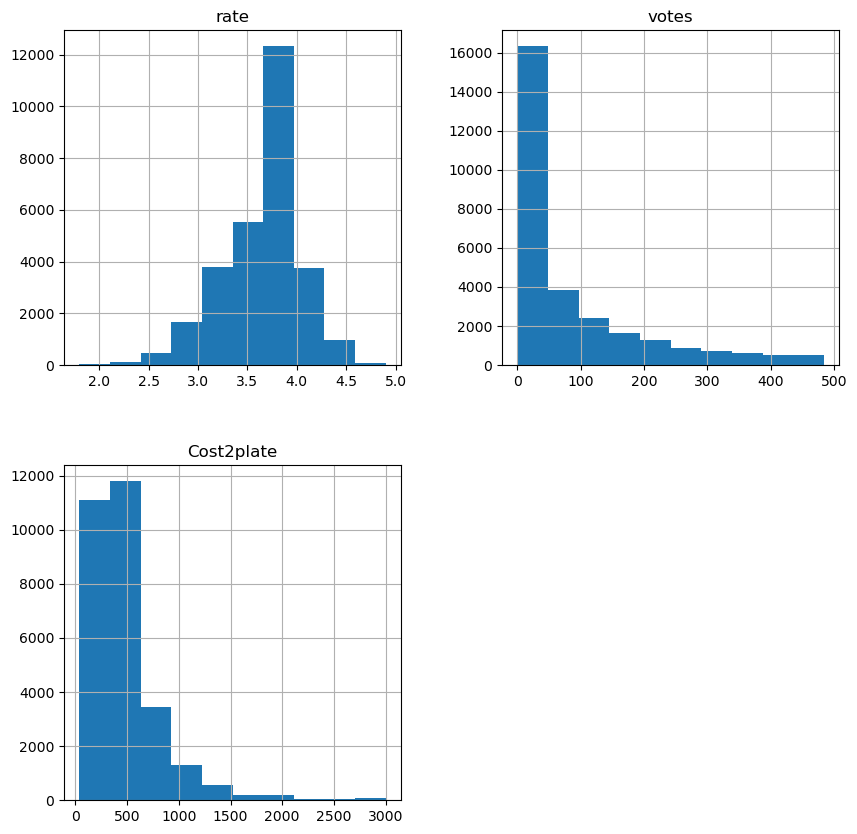

In [84]:
# Histogram of each feature
data.hist(bins=10,figsize=(10,10))    
plt.show()

# Count Plot of Various Locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Sarjapur Road'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Old Airport Road'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'Brigade Road'),
  Text(22, 0, 'Ulsoor'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'Domlur'),
  Text(25, 0, 'Malleshwaram'),
  Text(26, 0, 'Kammanahalli'),
  Text(27, 0, 'Koramangala 6

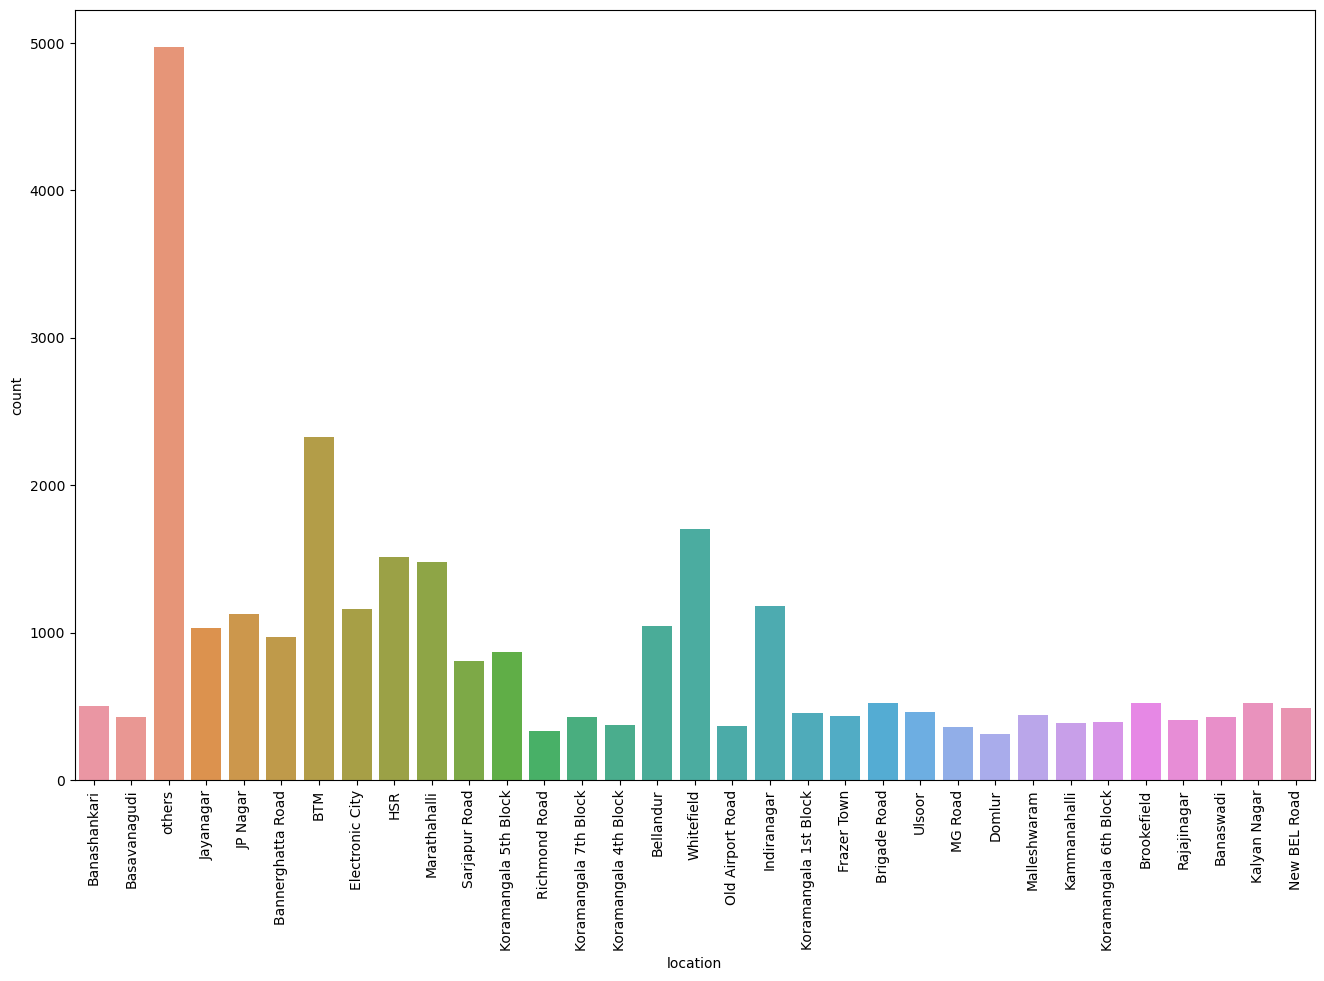

In [85]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=data,x='location')
plt.xticks(rotation=90)

**Based on the analysis, it is evident that the location "BTM" exhibits the highest concentration of restaurants, while "Domlur" has the lowest number of establishments.**

# Visualizing Online Order

<Axes: xlabel='online_order', ylabel='count'>

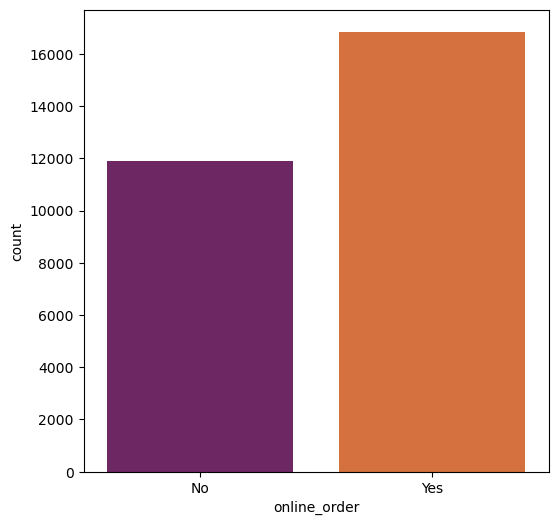

In [86]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='online_order', palette = 'inferno')

**The "Online_order" column shows a prominent preference for the option "Yes," indicating a substantial proportion of customers opt for online orders.**

# Visualizing book_table



<Axes: xlabel='book_table', ylabel='count'>

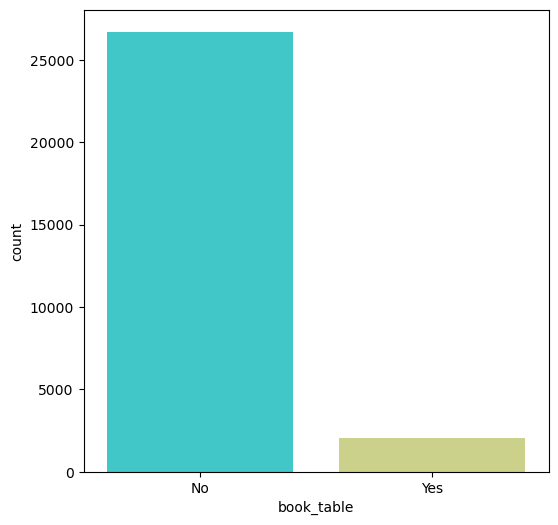

In [87]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='book_table', palette = 'rainbow')

**the analysis reveals a comparatively lower count of "book_table" instances with the choice "No."**

# Visualizing Online Order vs Rate


<Axes: xlabel='online_order', ylabel='rate'>

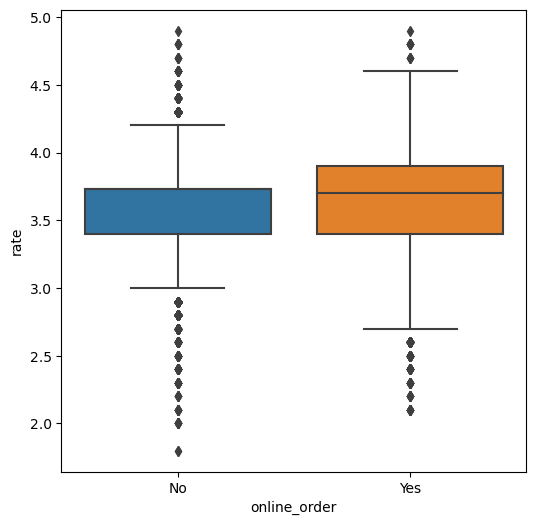

In [88]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate',data = data,orient='v')

# Visualizing Book Table vs Rate



<Axes: xlabel='book_table', ylabel='rate'>

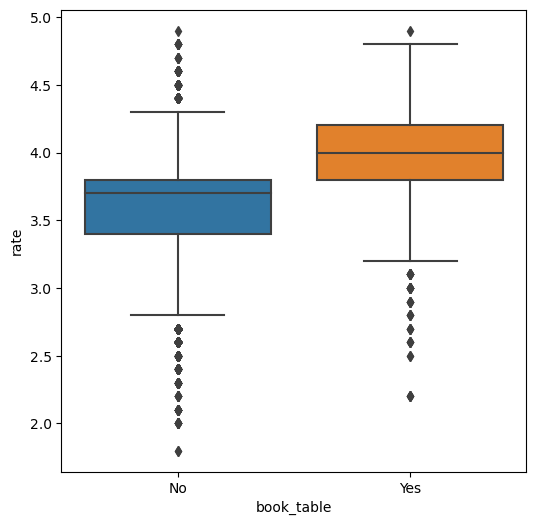

In [89]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = data)

# Visualizing Online Order Facility, Location Wise



In [90]:
df1 = data.groupby(['location','online_order'])['name'].count() # i am going to grouping my data location wise and i 
                                                                              #going to create new csv formate.
    
#to_csv() function converts DataFrame into CSV data. We can pass a file object to write the CSV data into a file.
                                     #Otherwise, the CSV data is returned in the string format.       
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                     782  1542
Banashankari            246   256
Banaswadi               213   213
Bannerghatta Road       392   575
Basavanagudi            176   254
Bellandur               434   608
Brigade Road            209   312
Brookefield             188   331
Domlur                  163   146
Electronic City         649   512
Frazer Town             200   235
HSR                     400  1114
Indiranagar             435   748
JP Nagar                472   657
Jayanagar               329   703
Kalyan Nagar            216   308
Kammanahalli            173   211
Koramangala 1st Block   126   329
Koramangala 4th Block   173   198
Koramangala 5th Block   256   614
Koramangala 6th Block   150   240
Koramangala 7th Block   160   270
MG Road                 198   161
Malleshwaram            175   268
Marathahalli            586   894
New BEL Road            220   269
Old Airport Road        187   182
Rajajinagar             185   223
Richmond Road           208   124
Sarjapur Road           255   550
Ulsoor                  181   280
Whitefield              823   883
others                 2333  2643

<Axes: xlabel='location'>

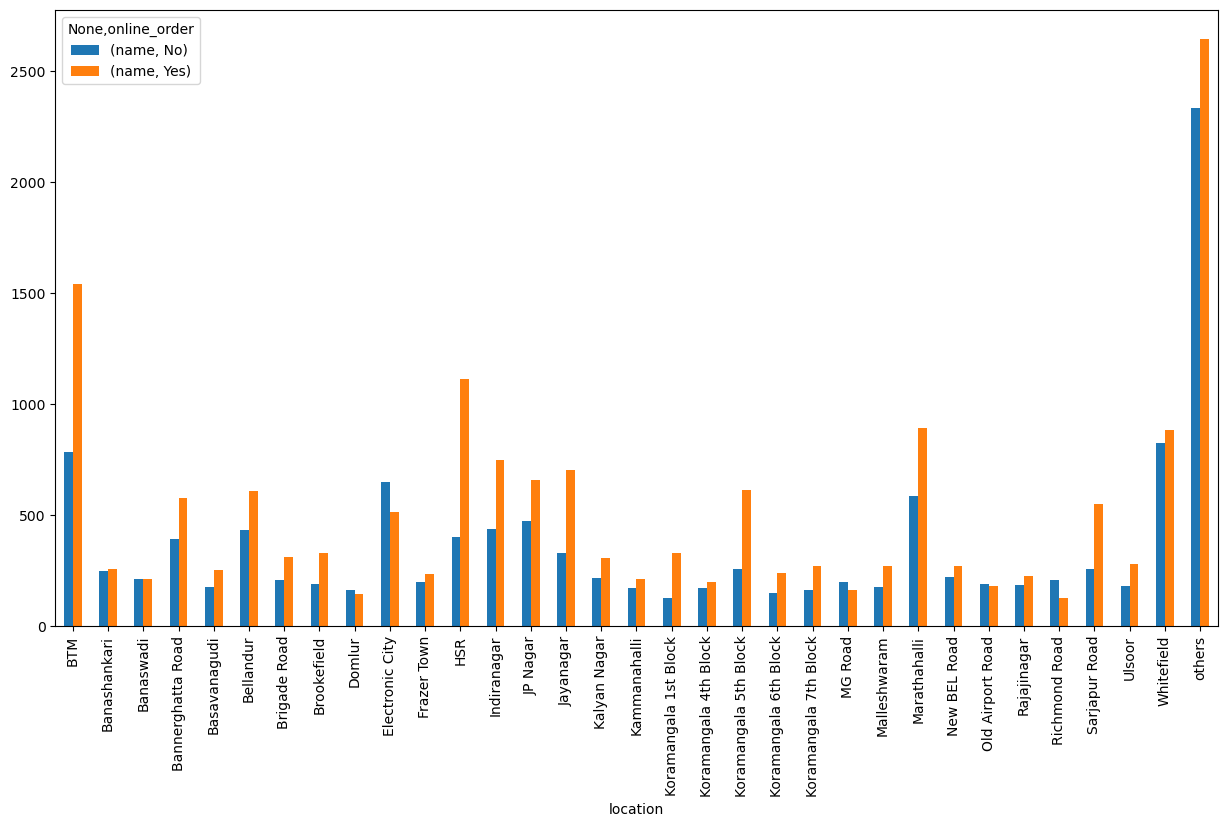

In [91]:
df1.plot(kind = 'bar', figsize = (15,8))

**Furthermore, in the specific location of "BTM," the prevalence of online orders is relatively high, whereas "Domlur" reports a lower frequency of online orders.**

# Visualizing Book Table Facility, Location Wise



In [92]:
df2 = data.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    2282   42
Banashankari            481   21
Banaswadi               423    3
Bannerghatta Road       951   16
Basavanagudi            422    8
Bellandur               990   52
Brigade Road            451   70
Brookefield             483   36
Domlur                  288   21
Electronic City        1096   65
Frazer Town             434    1
HSR                    1441   73
Indiranagar            1041  142
JP Nagar               1065   64
Jayanagar               927  105
Kalyan Nagar            457   67
Kammanahalli            369   15
Koramangala 1st Block   455    0
Koramangala 4th Block   282   89
Koramangala 5th Block   713  157
Koramangala 6th Block   382    8
Koramangala 7th Block   386   44
MG Road                 243  116
Malleshwaram            419   24
Marathahalli           1424   56
New BEL Road            475   14
Old Airport Road        333   36
Rajajinagar             397   11
Richmond Road           292   40
Sarjapur Road           747   58
Ulsoor                  393   68
Whitefield             1607   99
others                 4566  410

<Axes: xlabel='location'>

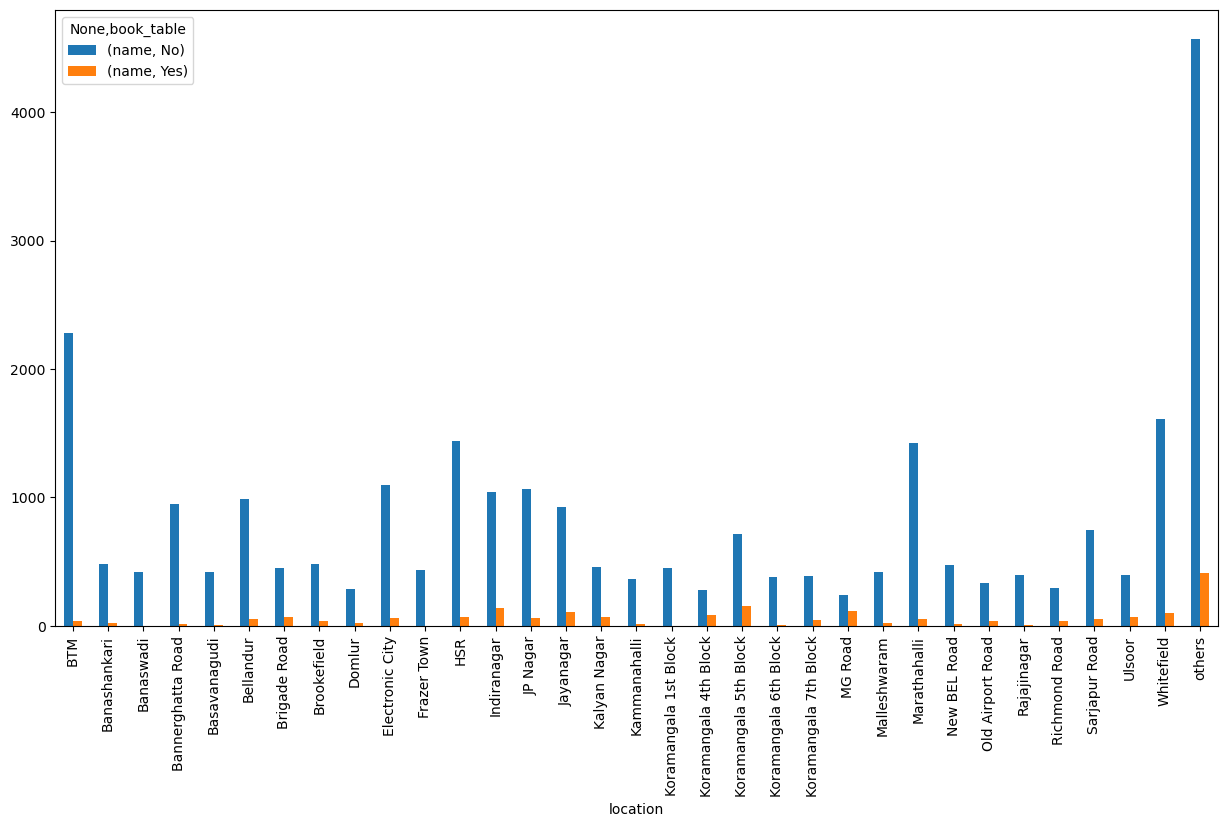

In [93]:
df2.plot(kind = 'bar', figsize = (15,8))

**Additionally, in the vicinity of "Koramangala 5th block," table bookings are notably high, while "BTM" displays the least occurrence of such reservations.**

# Visualizing Types of Restaurents vs Rate



<Axes: xlabel='Type', ylabel='rate'>

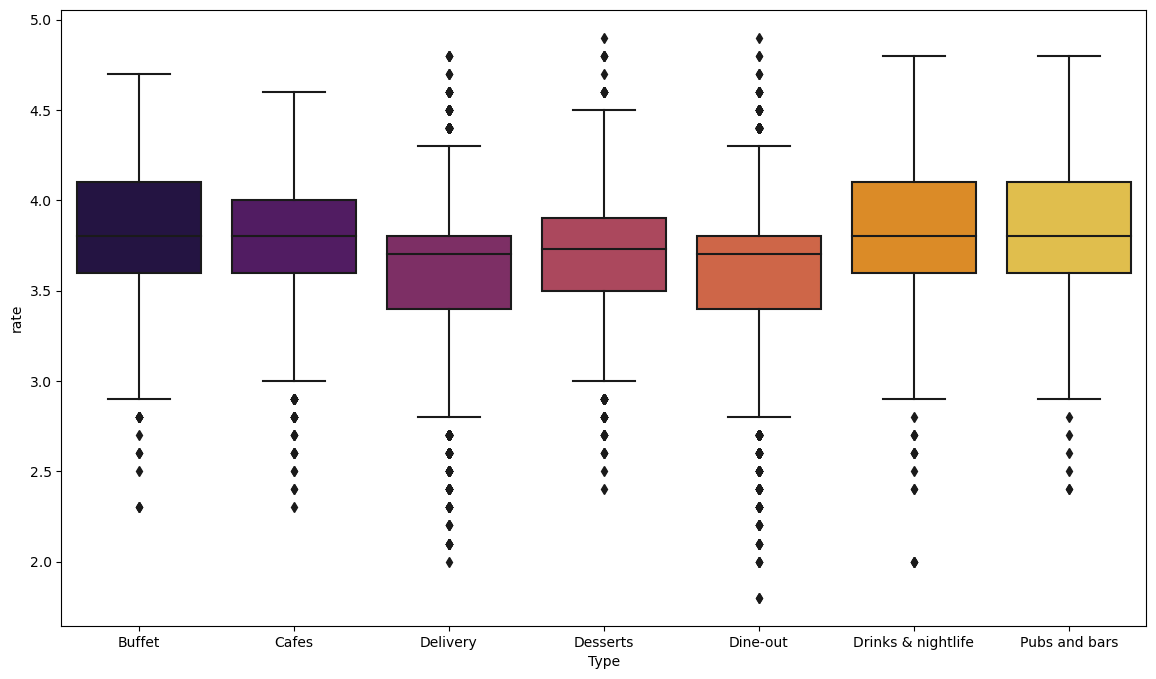

In [94]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = data, palette = 'inferno',orient='v')

**An interesting observation emerges, highlighting that Pubs and Bars,Buffet and Drinks&nightlife tend to boast higher ratings than other restaurant types.**

# Grouping Types of Restaurents, location wise



In [95]:
df3 = data.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                        9    38     1329      107      821   
Banashankari               1    21      212       43      220   
Banaswadi                  0    13      157       19      232   
Bannerghatta Road          2    27      471       91      375   
Basavanagudi               4     6      183       44      190   
Bellandur                 22    34      482       66      421   
Brigade Road              11    21      204       48      209   
Brookefield                0    10      269       37      201   
Domlur                    11     8      154       22      101   
Electronic City           17    23      529       70      486   
Frazer Town                0    10      244       46      133   
HSR                        7    31      944      105      416   
Indiranagar                7    66      622      105      343   
JP Nagar                  13    30      537      100      441   
Jayanagar                  8    36      471      107      403   
Kalyan Nagar               5    21      176       44      271   
Kammanahalli               1    10      148       17      205   
Koramangala 1st Block      0     7      285       26      130   
Koramangala 4th Block      4    28      179       31       92   
Koramangala 5th Block      4    56      396      108      267   
Koramangala 6th Block      4    20      202       32      115   
Koramangala 7th Block      9    24      178       57      147   
MG Road                   14    35       95       32      139   
Malleshwaram               0    22      169       63      179   
Marathahalli              16    29      808       90      529   
New BEL Road               2    18      239       31      193   
Old Airport Road           8     5      163       34      142   
Rajajinagar                3     4      181       42      173   
Richmond Road             32    13       97       37      137   
Sarjapur Road              7    14      433       75      264   
Ulsoor                     9    27      189       35      183   
Whitefield                22    37      848      118      640   
others                    89   151     2355      353     1848   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                    9            11  
Banashankari                           5             0  
Banaswadi                              4             1  
Bannerghatta Road                      1             0  
Basavanagudi                           3             0  
Bellandur                              9             8  
Brigade Road                          20             8  
Brookefield                            2             0  
Domlur                                 4             9  
Electronic City                       18            18  
Frazer Town                            1             1  
HSR                                    5             6  
Indiranagar                           17            23  
JP Nagar                               6             2  
Jayanagar                              7             0  
Kalyan Nagar                           7             0  
Kammanahalli                           3             0  
Koramangala 1st Block                  1             6  
Koramangala 4th Block                 22            15  
Koramangala 5th Block                 17            22  
Koramangala 6th Block                  8             9  
Koramangala 7th Block                  2            13  
MG Road                               23            21  
Malleshwaram                           6             4  
Marathahalli                           8             0  
New BEL Road                           3             3  
Old Airport Road              

<Axes: xlabel='location'>

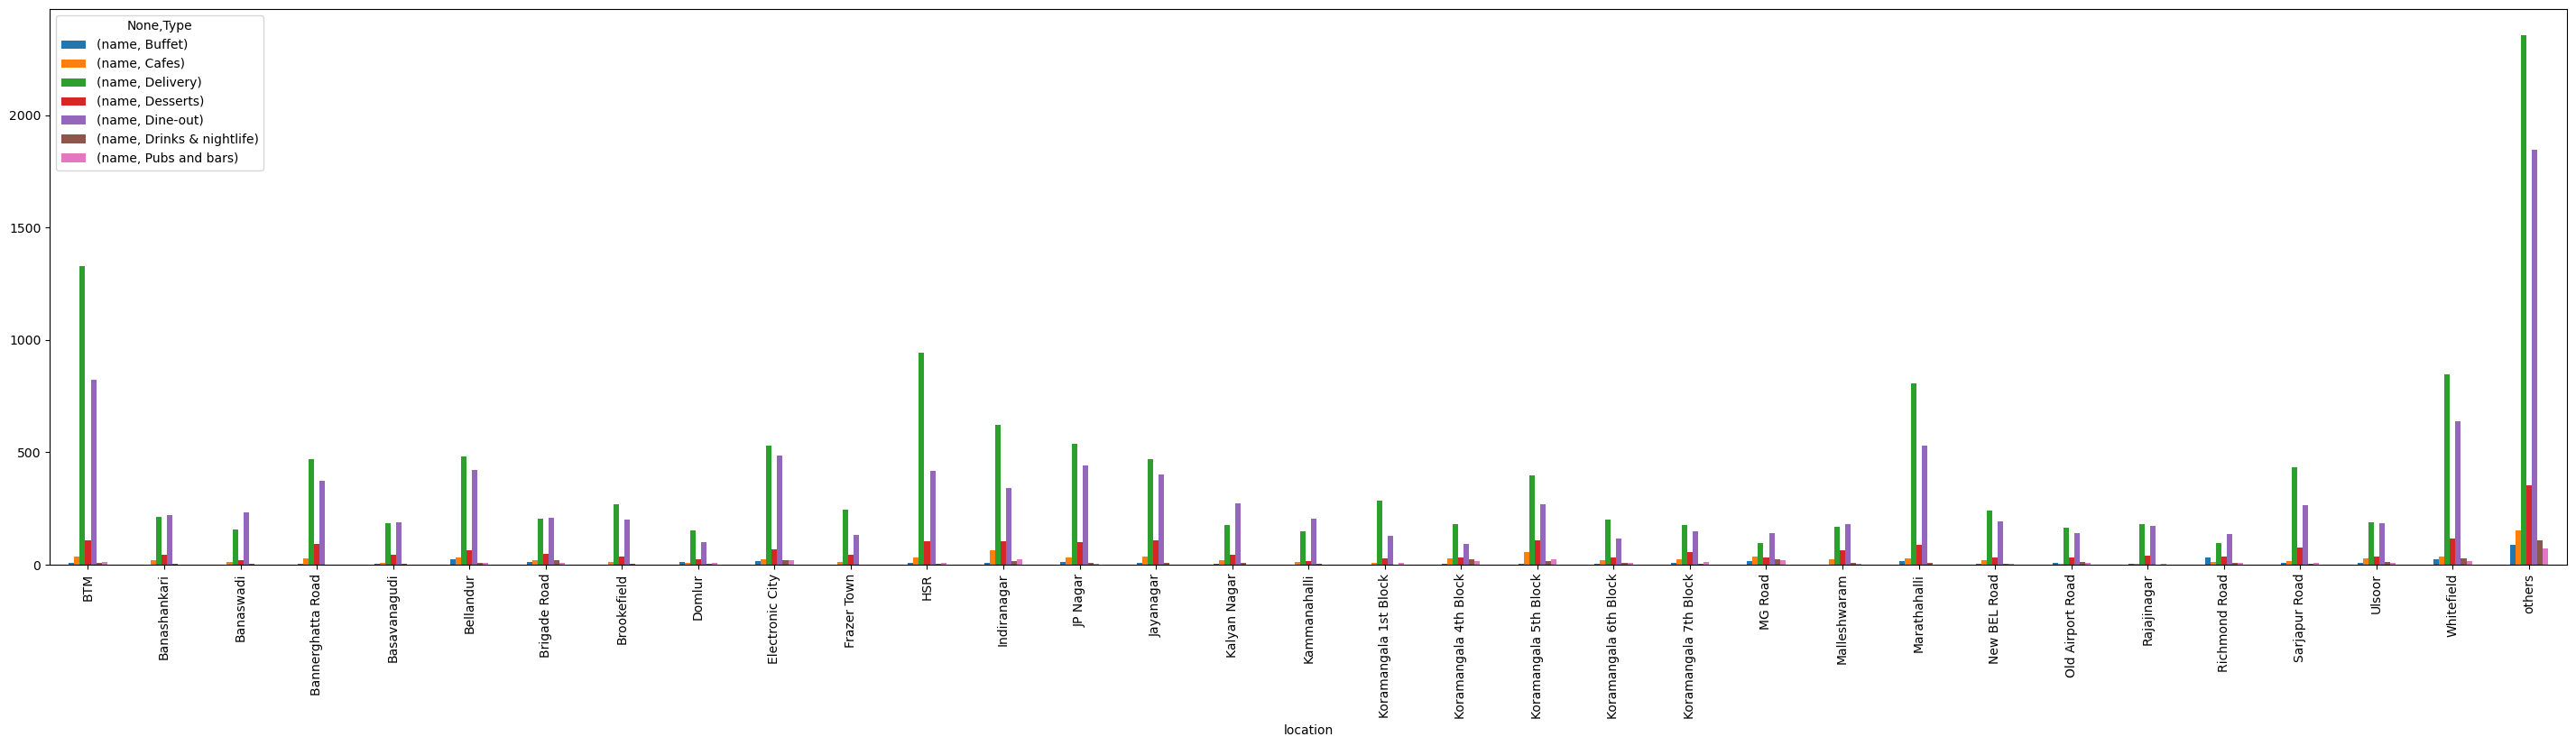

In [96]:
df3.plot(kind = 'bar', figsize = (36,8))

**Notably, the location "BTM" experiences a substantial volume of both delivery and dine-out services.**

# No. of Votes, Location Wise



In [97]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2219506
Indiranagar,1196007
Koramangala 4th Block,685156
BTM,619376
Church Street,594979


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'BTM'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Lavelle Road'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Koramangala 7th Block'),
  Text(9, 0, 'Jayanagar'),
  Text(10, 0, 'Whitefield'),
  Text(11, 0, 'Koramangala 6th Block'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'MG Road'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Residency Road'),
  Text(17, 0, 'Cunningham Road'),
  Text(18, 0, 'St. M

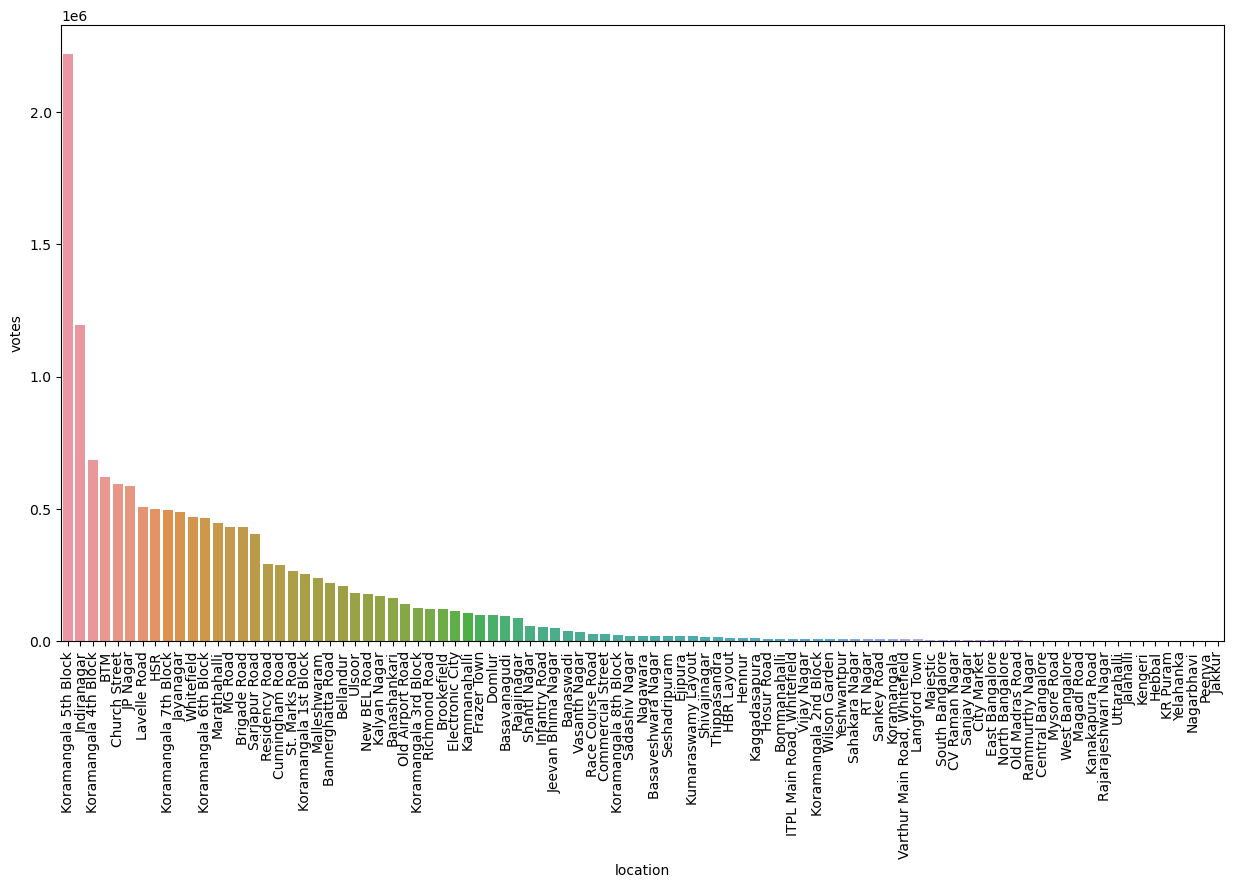

In [98]:
plt.figure(figsize = (15,8))
sns.barplot(data=df5, x = df5.index, y='votes')
plt.xticks(rotation = 90)

**"Koramangala 5th block" garners a significant number of votes, indicating strong engagement and participation from customers in this particular area.**

# Visualizing Top Cuisines



In [99]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
North Indian,558654
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930


In [100]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930
South Indian,161991


(array([   0,    1,    2, ..., 2719, 2720, 2721]),
 [Text(0, 0, 'Pizza, Cafe, Italian'),
  Text(1, 0, 'Cafe, American, Burger, Steak'),
  Text(2, 0, 'North Indian, Chinese'),
  Text(3, 0, 'North Indian, Mughlai, South Indian, Chinese'),
  Text(4, 0, 'South Indian'),
  Text(5, 0, 'North Indian, Thai, Japanese, Continental, Cafe'),
  Text(6, 0, 'North Indian, European, Mediterranean'),
  Text(7, 0, 'North Indian, Continental, Chinese'),
  Text(8, 0, 'North Indian, European, Mediterranean, BBQ, Kebab'),
  Text(9, 0, 'North Indian, Mughlai'),
  Text(10, 0, 'Cafe, Italian, Burger, American, Steak'),
  Text(11, 0, 'Chinese'),
  Text(12, 0, 'Cafe'),
  Text(13, 0, 'Continental, North Indian, Italian, South Indian, Finger Food'),
  Text(14, 0, 'American, North Indian, Chinese, Finger Food, Momos'),
  Text(15, 0, 'European, Continental'),
  Text(16, 0, 'North Indian, Chinese, BBQ'),
  Text(17, 0, 'Continental, Asian, North Indian'),
  Text(18, 0, 'Mediterranean, Pizza, Continental, Seafood, Sala

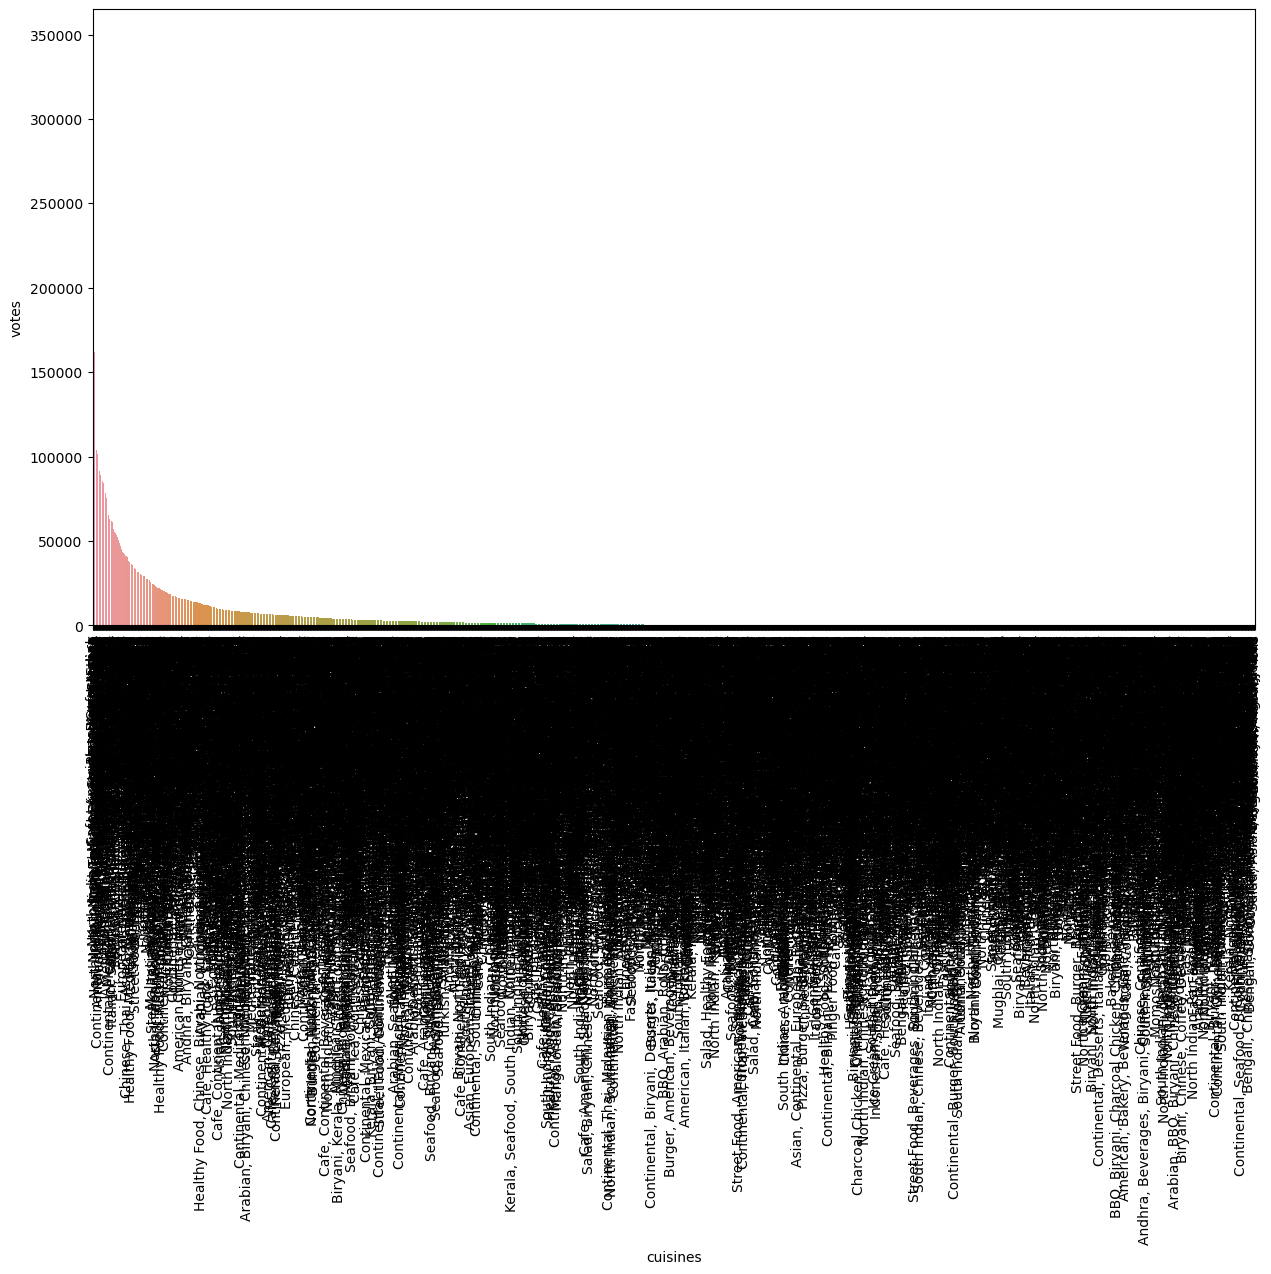

In [101]:
plt.figure(figsize = (15,8))
sns.barplot(data=df7, x = df7.index, y='votes')
plt.xticks(rotation = 90)

#### 1) Based on the analysis, it is evident that the location "BTM" exhibits the highest concentration of restaurants, while "Domlur" has the lowest number of establishments.

#### 2) The "Online_order" column shows a prominent preference for the option "Yes," indicating a substantial proportion of customers opt for online orders.

#### 3) Conversely, the analysis reveals a comparatively lower count of "Table_order" instances with the choice "No."

#### 4) Furthermore, in the specific location of "BTM," the prevalence of online orders is relatively high, whereas "Domlur" reports a lower frequency of online orders.

#### 5) Additionally, in the vicinity of "Koramangala 5th block," table bookings are notably high, while "BTM" displays the least occurrence of such reservations.

#### 6) **An interesting observation emerges, highlighting that Pubs and Bars,Buffet and Drinks&nightlife tend to boast higher ratings than other restaurant types.**

#### 7) Notably, the location "BTM" experiences a substantial volume of both delivery and dine-out services.

#### 8) Finally, "Koramangala 5th block" garners a significant number of votes, indicating strong engagement and participation from customers in this particular area.

# visualixzation has been completed now shift ML

In [102]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,others,700.0,Cafes


In [103]:
data['rate'].value_counts()

3.730491    5029
3.700000    2500
3.900000    2409
3.800000    2392
3.600000    2148
3.500000    1777
4.000000    1661
3.400000    1622
3.300000    1501
4.100000    1309
3.200000    1263
3.100000    1034
4.200000     802
3.000000     721
2.900000     543
4.300000     514
2.800000     412
4.400000     328
2.700000     214
2.600000     177
4.500000     111
2.500000      66
2.400000      58
4.600000      49
2.300000      37
2.100000      19
4.800000      15
2.200000      12
2.000000      10
4.700000       9
1.800000       2
4.900000       2
Name: rate, dtype: int64

In [104]:
rate=data['rate']
rate

3        3.700000
4        3.800000
5        3.800000
6        3.600000
8        4.000000
           ...   
51712    3.600000
51713    3.730491
51714    3.730491
51715    4.300000
51716    3.400000
Name: rate, Length: 28746, dtype: float64

In [105]:
rate

# Define bin edges (boundaries)

bin_edges = [0,2.500000 ,3.500000 ,4.500000,5]

# Define bin labels for each interval
bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Use the cut() function to create bins
binned_data = pd.cut(rate, bins=bin_edges, labels=bin_labels)


In [106]:

# Create a DataFrame with original data and binned data
DF= pd.DataFrame({'Rate': binned_data})

print(DF)

         Rate
3        High
4        High
5        High
6        High
8        High
...       ...
51712    High
51713    High
51714    High
51715    High
51716  Medium

[28746 rows x 1 columns]


In [107]:
# i create new column as Rating and i insert my DF data into that column.
data['Rating']=DF

In [108]:
#i want to remove my rate column because i don't need that columns now
data.drop('rate',axis=1,inplace=True)

In [109]:
data.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,High
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,High
5,Timepass Dinner,Yes,No,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,High
6,Rosewood International Hotel - Bar & Restaurant,No,No,8,others,Casual Dining,others,800.0,Buffet,High
8,Penthouse Cafe,Yes,No,324,Banashankari,Cafe,others,700.0,Cafes,High


In [110]:
data.reset_index(inplace=True)

In [111]:
data.drop('index',axis=1,inplace=True)

In [112]:
data

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,High
1,Grand Village,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,High
2,Timepass Dinner,Yes,No,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,High
3,Rosewood International Hotel - Bar & Restaurant,No,No,8,others,Casual Dining,others,800.0,Buffet,High
4,Penthouse Cafe,Yes,No,324,Banashankari,Cafe,others,700.0,Cafes,High
...,...,...,...,...,...,...,...,...,...,...
28741,Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,Whitefield,others,others,1500.0,Pubs and bars,High
28742,Vinod Bar And Restaurant,No,No,0,Whitefield,others,Finger Food,600.0,Pubs and bars,High
28743,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0,Whitefield,others,Finger Food,2000.0,Pubs and bars,High
28744,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,others,others,Finger Food,2500.0,Pubs and bars,High


## Label encoding

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
LE= LabelEncoder()
data['location']=LE.fit_transform(data['location'])

In [115]:
data['rest_type']=LE.fit_transform(data['rest_type'])

In [116]:
data['cuisines']=LE.fit_transform(data['cuisines'])
data['Type']=LE.fit_transform(data['Type'])

In [117]:
data

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Addhuri Udupi Bhojana,No,No,88,1,4,25,300.0,0,High
1,Grand Village,No,No,166,4,1,28,600.0,0,High
2,Timepass Dinner,Yes,No,286,4,1,18,600.0,0,High
3,Rosewood International Hotel - Bar & Restaurant,No,No,8,32,1,28,800.0,0,High
4,Penthouse Cafe,Yes,No,324,1,0,28,700.0,1,High
...,...,...,...,...,...,...,...,...,...,...
28741,Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,31,6,28,1500.0,6,High
28742,Vinod Bar And Restaurant,No,No,0,31,6,15,600.0,6,High
28743,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0,31,6,15,2000.0,6,High
28744,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,32,6,15,2500.0,6,High


In [118]:
print('online_order',data.online_order.nunique())
print('book_table',data.book_table.nunique())
print('Rating',data.Rating.nunique())

online_order 2
book_table 2
Rating 4


In [119]:
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())
print('Rating---------->','\n',data.Rating.unique())

rest_type----------> ['No' 'Yes']
type----------> 
 ['No' 'Yes']
Rating----------> 
 ['High', 'Medium', 'Very High', 'Low']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


Label Encoding (Ordinal Encoding)     ---  
OHE (Nominal Encoding)                ---

In [120]:
data.replace({'Low':0,'Medium':1,'High':2,'Very High':3},inplace=True)

In [121]:
data.replace({'Yes':0,'No':1},inplace=True)

In [122]:
data.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Addhuri Udupi Bhojana,1,1,88,1,4,25,300.0,0,2
1,Grand Village,1,1,166,4,1,28,600.0,0,2
2,Timepass Dinner,0,1,286,4,1,18,600.0,0,2
3,Rosewood International Hotel - Bar & Restaurant,1,1,8,32,1,28,800.0,0,2
4,Penthouse Cafe,0,1,324,1,0,28,700.0,1,2


In [123]:
print('Rating---------->','\n',data.Rating.unique())
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())

Rating----------> 
 [2, 1, 3, 0]
Categories (4, int64): [0 < 1 < 2 < 3]
rest_type----------> [1 0]
type----------> 
 [1 0]


In [124]:
data.drop(['name'],axis=1,inplace=True) #axis=1 is drop column axis=0 drop row
data.head()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,1,1,88,1,4,25,300.0,0,2
1,1,1,166,4,1,28,600.0,0,2
2,0,1,286,4,1,18,600.0,0,2
3,1,1,8,32,1,28,800.0,0,2
4,0,1,324,1,0,28,700.0,1,2


In [125]:
data.describe()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
count,28746.000000,28746.000000,28746.000000,28746.000000,28746.000000,28746.000000,28746.000000,28746.000000
mean,0.413727,0.929347,85.692375,17.463230,3.456307,22.943923,490.892194,2.845091
std,0.492509,0.256249,112.894340,11.118091,1.878068,7.992882,355.445574,1.100122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,0.000000,1.000000,7.000000,9.000000,1.000000,20.000000,300.000000,2.000000
50%,0.000000,1.000000,34.000000,16.000000,4.000000,28.000000,400.000000,2.000000
75%,1.000000,1.000000,122.000000,29.000000,4.000000,28.000000,600.000000,4.000000
max,1.000000,1.000000,484.000000,32.000000,6.000000,28.000000,3000.000000,6.000000


## Now i will be backuping the data

In [126]:
data_backup = data.copy(deep=True)

# Split the dataframe into x & y

In [127]:
# Separate object for target feature 
y= data['Rating']

# Separate object for Predictors 
X = data.drop('Rating',axis=1)

In [128]:
X.head(3)

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
0,1,1,88,1,4,25,300.0,0
1,1,1,166,4,1,28,600.0,0
2,0,1,286,4,1,18,600.0,0


In [129]:
y.head(2)

0    2
1    2
Name: Rating, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [130]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (28746, 8), Dependent Features Shape = (28746,)


# Splitting the data into Training data and Test data

In [131]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
      # test size is 80% data is training and 20% data is testing
    #Random state ensures that the splits that you generate are reproducible.
                              #this ensures that the random numbers are generated in the same order.

In [132]:
print(X.shape, X_train.shape,X_test.shape)

(28746, 8) (22996, 8) (5750, 8)


In [133]:
print(y.shape,y_train.shape,y_test.shape)

(28746,) (22996,) (5750,)


In [134]:
X.describe()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
count,28746.000000,28746.000000,28746.000000,28746.000000,28746.000000,28746.000000,28746.000000,28746.000000
mean,0.413727,0.929347,85.692375,17.463230,3.456307,22.943923,490.892194,2.845091
std,0.492509,0.256249,112.894340,11.118091,1.878068,7.992882,355.445574,1.100122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,0.000000,1.000000,7.000000,9.000000,1.000000,20.000000,300.000000,2.000000
50%,0.000000,1.000000,34.000000,16.000000,4.000000,28.000000,400.000000,2.000000
75%,1.000000,1.000000,122.000000,29.000000,4.000000,28.000000,600.000000,4.000000
max,1.000000,1.000000,484.000000,32.000000,6.000000,28.000000,3000.000000,6.000000


**It is used to scale and standardize the features of a dataset before feeding it into a machine learning algorithm. The primary purpose of the StandardScaler is to make the features have a mean of 0 and a standard deviation of 1.In classification tasks, the target variable is categorical, and the goal is to predict a class label or probability for each instance. Scaling the features using StandardScaler can improve the performance of some classification algorithms, especially those that rely on distance-based calculations.**

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [137]:
X.describe()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
count,2.874600e+04,2.874600e+04,2.874600e+04,2.874600e+04,2.874600e+04,2.874600e+04,2.874600e+04,2.874600e+04
mean,3.262772e-17,2.521233e-17,1.067816e-16,-1.898340e-16,-1.581950e-17,3.559388e-17,-4.745850e-17,-3.954875e-18
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-8.400538e-01,-3.626792e+00,-7.590625e-01,-1.570731e+00,-1.840384e+00,-2.870594e+00,-1.268549e+00,-2.586204e+00
25%,-8.400538e-01,2.757258e-01,-6.970566e-01,-7.612257e-01,-1.307913e+00,-3.683245e-01,-5.370598e-01,-7.681929e-01
50%,-8.400538e-01,2.757258e-01,-4.578907e-01,-1.316103e-01,2.895010e-01,6.325835e-01,-2.557178e-01,-7.681929e-01
75%,1.190400e+00,2.757258e-01,3.216127e-01,1.037676e+00,2.895010e-01,6.325835e-01,3.069660e-01,1.049818e+00
max,1.190400e+00,2.757258e-01,3.528207e+00,1.307511e+00,1.354444e+00,6.325835e-01,7.059172e+00,2.867829e+00


# Build the Logistic regression Algorithm

In [138]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [139]:
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [140]:
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100)

Train Accuracy 66.65941902939642
Test Accuracy 67.21739130434783


In [141]:
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

confusion_matrix:- 
 [[    0     0   165     0]
 [    0     4  7435     0]
 [    0    11 15325     1]
 [    0     0    55     0]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.27      0.00      0.00      7439
           2       0.67      1.00      0.80     15337
           3       0.00      0.00      0.00        55

    accuracy                           0.67     22996
   macro avg       0.23      0.25      0.20     22996
weighted avg       0.53      0.67      0.53     22996



Precision=True possitive/(true possitive/false possitive)

recall truth is base how many has my gods samples then how many i got correct

 the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive

    A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. If you have never used it before to evaluate the performance of your model then this article is for you.

**When the train accuracy is low, and the test accuracy is high, it typically indicates that the model is suffering from underfitting.**

**An accuracy of 66.65% on the training data and 67.22% on the test data indicates that the logistic regression model is performing moderately well in terms of correctly classifying instances.**

Underfitting and overfitting are two common issues that can arise when training machine learning models:

1. **Underfitting:**
   - Underfitting occurs when the model is too simple to capture the underlying patterns in the data, leading to poor performance on both the training and test datasets.
   - The model fails to learn the relationships and complexities present in the data, resulting in low accuracy on both the training and test sets.
   - Underfitting usually occurs when the model is too linear or has too few parameters to represent the data adequately.

2. **Overfitting:**
   - Overfitting occurs when the model is too complex and memorizes the noise or random fluctuations in the training data rather than learning the underlying patterns.
   - The model performs very well on the training data but exhibits poor generalization to unseen data, resulting in significantly lower accuracy on the test set compared to the training set.
   - Overfitting often happens when the model has too many parameters or when the training data is insufficient, causing the model to over-adapt to the noise in the training data.

In summary, underfitting happens when the model is too simple, and both training and test accuracies are low. Overfitting occurs when the model is too complex, and the training accuracy is high while the test accuracy is considerably lower. Balancing the model's complexity and using techniques such as regularization and cross-validation can help mitigate these issues and improve the model's generalization performance.

# DecisionTree Algorithm

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.52600452252565 

Test Accuracy:- 91.79130434782608 

confusion_matrix:- 
 [[  165     0     0     0]
 [    3  7430     6     0]
 [    1    99 15237     0]
 [    0     0     0    55]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       165
           1       0.99      1.00      0.99      7439
           2       1.00      0.99      1.00     15337
           3       1.00      1.00      1.00        55

    accuracy                           1.00     22996
   macro avg       0.99      1.00      0.99     22996
weighted avg       1.00      1.00      1.00     22996



# Feature Selection Technique 

In [144]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesClassifier

selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

In [145]:
print(selection.feature_importances_)

[0.01311223 0.0154399  0.51827353 0.16092431 0.04743022 0.07808641
 0.14930033 0.01743307]


In [146]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

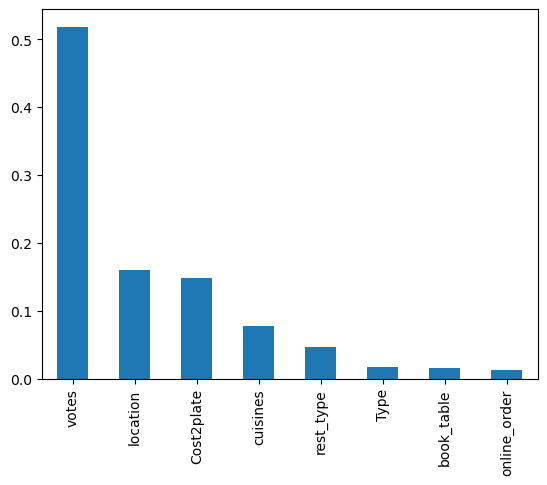

In [147]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [148]:
X_imp = X[feat_importances.nlargest(5).index]
X_imp

,votes,location,Cost2plate,cuisines,rest_type
0,0.020441,-1.480786,-0.537060,0.257243,0.289501
1,0.711364,-1.210951,0.306966,0.632584,-1.307913
2,1.774324,-1.210951,0.306966,-0.618551,-1.307913
3,-0.688199,1.307511,0.869650,0.632584,-1.307913
4,2.110928,-1.480786,0.588308,0.632584,-1.840384
...,...,...,...,...,...
28741,-0.519897,1.217566,2.839043,0.632584,1.354444
28742,-0.759063,1.217566,0.306966,-0.993892,1.354444
28743,-0.759063,1.217566,4.245753,-0.993892,1.354444
28744,1.331424,1.307511,5.652462,-0.993892,1.354444


In [149]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [150]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.19986084536441 

Test Accuracy:- 93.04347826086956 

confusion_matrix:- 
 [[  165     0     0     0]
 [    5  7404    30     0]
 [    1   146 15190     0]
 [    0     0     2    53]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       165
           1       0.98      1.00      0.99      7439
           2       1.00      0.99      0.99     15337
           3       1.00      0.96      0.98        55

    accuracy                           0.99     22996
   macro avg       0.99      0.99      0.99     22996
weighted avg       0.99      0.99      0.99     22996



# hyperparameters

In [151]:
# Number of trees in random Forest
criterion = ["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [152]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [153]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV( DM ,param_distributions = decetion_grid,cv=4,random_state = 0)

In [154]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=0)

In [155]:
rf_model.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 29,
 'criterion': 'entropy'}

In [156]:
DM = DecisionTreeClassifier(criterion='log_loss',min_samples_split= 15,min_samples_leaf= 1,max_features= 'auto',max_depth= 47)
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 90.92450861019307 

Test Accuracy:- 85.73913043478261 

confusion_matrix:- 
 [[   73    38    54     0]
 [   22  6607   810     0]
 [   27  1106 14197     7]
 [    0     4    19    32]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.60      0.44      0.51       165
           1       0.85      0.89      0.87      7439
           2       0.94      0.93      0.93     15337
           3       0.82      0.58      0.68        55

    accuracy                           0.91     22996
   macro avg       0.80      0.71      0.75     22996
weighted avg       0.91      0.91      0.91     22996



**1) Following the decision tree implementation, the model demonstrated exceptional accuracy rates on both the training (99.52%) and test (91.94%) datasets, showcasing its ability to effectively learn and generalize.**

**2) Incorporating Feature Selection Techniques optimized the model's performance, resulting in slightly reduced, yet impressive accuracies of 99.19% on the training set and 93.09% on the test set.**

**3) Fine-tuning hyperparameters yielded a more balanced and robust performance, with the model achieving competitive accuracies of 91.52% on the training data and 86.85% on the test data, emphasizing the significance of striking the right balance between complexity and overfitting avoidance.**

**In conclusion, the Feature Selection Technique provides the best accuracy results, achieving high accuracy on both the training and testing data. This scenario indicates that the model is able to capture relevant features and generalize well to new data, making it the most promising option for this particular problem.**

# Random Forest Algorithm

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.52600452252565 

Test Accuracy:- 90.62608695652173 

confusion_matrix:- 
 [[  164     1     0     0]
 [    2  7394    43     0]
 [    1    62 15274     0]
 [    0     0     0    55]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       165
           1       0.99      0.99      0.99      7439
           2       1.00      1.00      1.00     15337
           3       1.00      1.00      1.00        55

    accuracy                           1.00     22996
   macro avg       0.99      1.00      0.99     22996
weighted avg       1.00      1.00      1.00     22996



### Feature Selection Technique

In [160]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [161]:
print(selection.feature_importances_)

[0.02292117 0.01898422 0.49409965 0.15811321 0.0654621  0.08104524
 0.14431533 0.01505907]


In [162]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

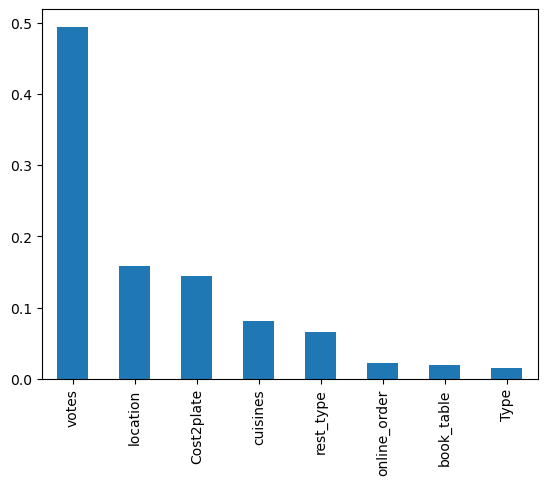

In [163]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [164]:
X_imp = X[feat_importances.nlargest(5).index]

In [165]:
X_imp

,votes,location,Cost2plate,cuisines,rest_type
0,0.020441,-1.480786,-0.537060,0.257243,0.289501
1,0.711364,-1.210951,0.306966,0.632584,-1.307913
2,1.774324,-1.210951,0.306966,-0.618551,-1.307913
3,-0.688199,1.307511,0.869650,0.632584,-1.307913
4,2.110928,-1.480786,0.588308,0.632584,-1.840384
...,...,...,...,...,...
28741,-0.519897,1.217566,2.839043,0.632584,1.354444
28742,-0.759063,1.217566,0.306966,-0.993892,1.354444
28743,-0.759063,1.217566,4.245753,-0.993892,1.354444
28744,1.331424,1.307511,5.652462,-0.993892,1.354444


In [166]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [167]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.19551226300226 

Test Accuracy:- 94.39999999999999 

confusion_matrix:- 
 [[  164     0     1     0]
 [    5  7361    73     0]
 [    0   104 15231     2]
 [    0     0     0    55]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       165
           1       0.99      0.99      0.99      7439
           2       1.00      0.99      0.99     15337
           3       0.96      1.00      0.98        55

    accuracy                           0.99     22996
   macro avg       0.98      0.99      0.99     22996
weighted avg       0.99      0.99      0.99     22996



# hyperparameters

In [168]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [169]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [170]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [171]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [172]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 35}

In [173]:
RF = RandomForestClassifier(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='sqrt',max_depth = 35)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 93.95981909897372 

Test Accuracy:- 89.21739130434783 

confusion_matrix:- 
 [[   48    19    98     0]
 [    3  6649   787     0]
 [    0   447 14890     0]
 [    0     0    35    20]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.94      0.29      0.44       165
           1       0.93      0.89      0.91      7439
           2       0.94      0.97      0.96     15337
           3       1.00      0.36      0.53        55

    accuracy                           0.94     22996
   macro avg       0.95      0.63      0.71     22996
weighted avg       0.94      0.94      0.94     22996



**The Random Forest model demonstrated exceptional accuracies on both the training (99.52%) and test (90.45%) datasets, showcasing its ability to effectively learn and generalize.**

**Employing Feature Selection Techniques improved the model's performance, yielding impressive accuracies of 99.20% on the training set and 94.20% on the test set, highlighting the significance of selecting relevant features to enhance predictive capabilities.**

**Fine-tuning the hyperparameters resulted in a more balanced and robust performance, with the model achieving competitive accuracies of 93.82% on the training data and 89.16% on the test data, underscoring the importance of optimizing hyperparameters to achieve a suitable trade-off between model complexity and overfitting avoidance.**

**In conclusion, the Feature Selection Technique provides the best accuracy results, achieving high accuracy on both the training and testing data. This scenario indicates that the model is able to capture relevant features and generalize well to new data, making it the most promising option for this particular problem.**

In [174]:
models = ["Logistic Regression Train", "Logistic Regression test", "Decision Tree Train", "Decision Tree Test","Random Forest Train","Random Forest Test"]
accuracy_list = [66.65,67.22, 99.19,93.10, 99.20,94.20]


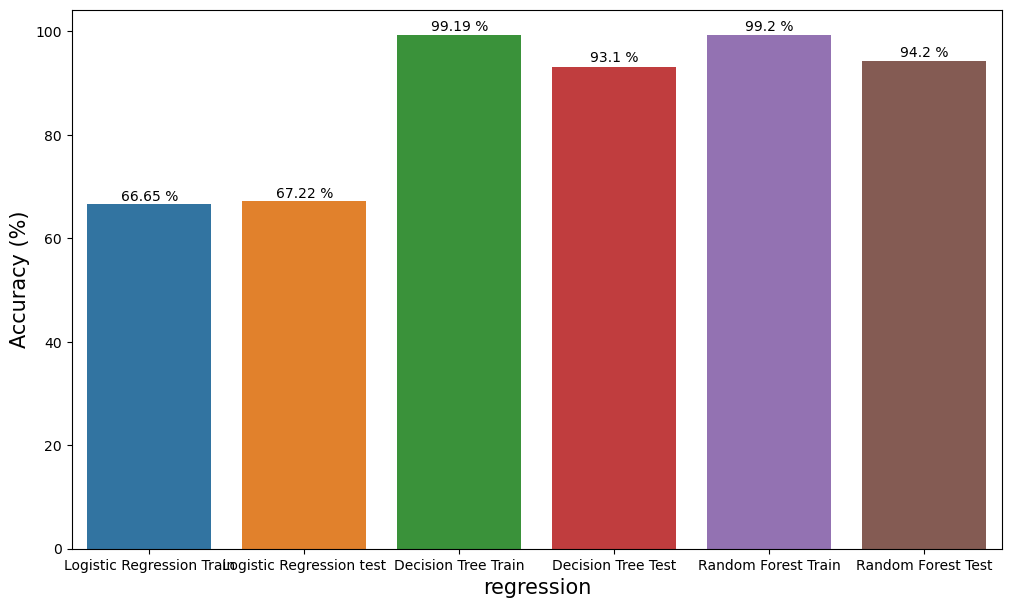

In [175]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("classification", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")
plt.show()

# conclusion:-

**The Logistic Regression model achieved an accuracy of 66.65% on the training data and 67.22% on the test data.**

**The Decision Tree model yielded high accuracy levels with 99.19% on the training data and 93.09% on the test data.**

**The Random Forest model obtained respectable accuracies of 99.20% on the training data and 94.20%  on the test data.**



**In conclusion, the Random Forest model provides the best accuracy results, with a high testing accuracy of 81.58%. This suggests that the Random Forest model is more likely to perform well on new, unseen data and is the most suitable choice among the three models for this specific problem.**

1. **Introduction:**
   - Begin by introducing the project, which aims to predict the most favorable restaurant locations in Bangalore based on customer ratings, facilitating strategic decision-making for restaurant owners and investors.

2. **Data Exploration and Insights:**
   - Highlight key insights obtained during data exploration, such as the location with the highest concentration of restaurants being "BTM," while "Domlur" has the lowest number of establishments.
   - Showcase the preference for online orders with a substantial proportion of customers opting for "Yes."
   - Mention that the analysis reveals a lower count of "Table_order" instances with the choice "No."
   - Emphasize that "BTM" has a relatively high prevalence of online orders, while "Domlur" reports a lower frequency.
   - Illustrate the popularity of Pubs and Bars, Buffet, and Drinks & Nightlife with higher ratings compared to other restaurant types.
   - Present data-driven evidence of "BTM" experiencing a substantial volume of both delivery and dine-out services.

3. **Machine Learning Models:**
   - Explain the implementation of three machine learning models: Logistic Regression, Decision Tree, and Random Forest.
   - Provide the accuracy results for each model on both training and testing datasets.
   - Emphasize that the Random Forest model achieved the highest accuracy on the testing dataset at 94.20%, making it the most suitable choice among the three models.

4. **Conclusion and Recommendations:**
   - Summarize the key findings and insights from the data analysis and machine learning models.
   - Reiterate the importance of predicting favorable restaurant locations for strategic decision-making by restaurant owners and investors.
   - Recommend the adoption of the Random Forest model due to its higher accuracy on the testing dataset.
   - Mention potential further improvements, such as gathering additional data, exploring different model architectures, or conducting more advanced feature engineering.
